Pendulum Motion Simulation: Simple & Double Pendulum
Simulating pendulum motion is a classic physics problem that demonstrates nonlinear dynamics and chaos, especially with the double pendulum.

Simple Pendulum Simulation
Numerical Method: Euler-Cromer or Runge-Kutta.

Parameter Example: Length=1m, Mass=1kg, Gravity=9.81m/s², Initial Angle≈60°.

ODE:

d
2
θ
d
t
2
=
−
g
l
sin
⁡
θ
dt 
2
 
d 
2
 θ
 =− 
l
g
 sinθ
Visualization: The pendulum swings back and forth, with its angular position plotted or animated.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

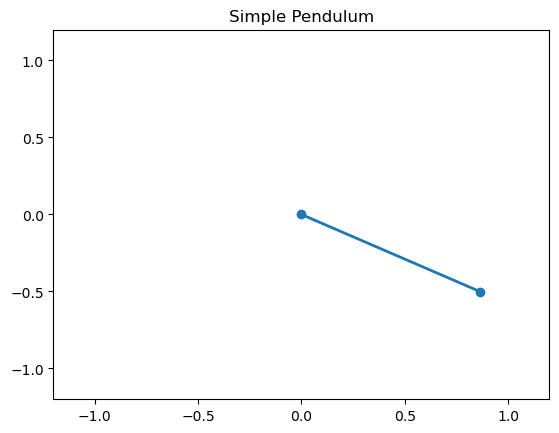

In [4]:
# Parameters
g = 9.81       # Gravity (m/s²)
l = 1.0        # Length (m)
theta0 = np.pi / 3  # Initial angle (60 degrees)
omega0 = 0.0        # Initial angular velocity

dt = 0.02
steps = 1000

def derivative(theta, omega):
    return -g / l * np.sin(theta)

theta = theta0
omega = omega0
thetas = []
for _ in range(steps):
    # RK4 integration
    k1 = dt * omega
    l1 = dt * derivative(theta, omega)
    k2 = dt * (omega + l1 / 2)
    l2 = dt * derivative(theta + k1 / 2, omega + l1 / 2)
    k3 = dt * (omega + l2 / 2)
    l3 = dt * derivative(theta + k2 / 2, omega + l2 / 2)
    k4 = dt * (omega + l3)
    l4 = dt * derivative(theta + k3, omega + l3)

    theta += (k1 + 2*k2 + 2*k3 + k4) / 6
    omega += (l1 + 2*l2 + 2*l3 + l4) / 6
    thetas.append(theta)

# Convert angles to (x, y) positions
xs = l * np.sin(thetas)
ys = -l * np.cos(thetas)

fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-l - 0.2, l + 0.2)
ax.set_ylim(-l - 0.2, l + 0.2)
ax.set_title("Simple Pendulum")

def animate(i):
    line.set_data([0, xs[i]], [0, ys[i]])
    return line,

ani = FuncAnimation(fig, animate, frames=steps, interval=10, blit=True)
plt.show()
